In [3]:
import numpy as np

**Creating arrays**

In [4]:
a = [1, 2, 3] #create a list object (default)
print(type(a))
print(a)

<class 'list'>
[1, 2, 3]


In [5]:
b = np.array([1, 2, 3]) #create a numpy.ndarray object
print(type(b))
print(b)
print(b.shape) #lists don't have shape attribute

<class 'numpy.ndarray'>
[1 2 3]
(3,)


In [6]:
a = [[1, 2, 3], [4, 5, 6]]    # Create a rank 2 list (a list of lists)
for row in a :
    print(len(row))

print(a[0][0], a[0][1], a[1][0]) #print individual elements

3
3
1 2 4


In [7]:
b = np.array( [[1, 2, 3], [4, 5, 6]] )    # Create a rank 2 array
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])   #print individual elements

(2, 3)
1 2 4


In [7]:
a = np.zeros((2,2))   # Create an array of all zeros
print('2x2 zeros:')
print(a)

b = np.ones((2,2))    # Create an array of all ones
print('2x2 ones:')
print(b)

c = np.full((2,2), 5)  # Create a constant array
print('2x2 constant=5:')
print(c)

d = np.eye(2)         # Create a 2x2 identity matrix
print('2x2 identity:')
print(d)

e = np.random.random((2,2))  # Create an array filled with random values
print('2x2 random (uniform 0 to 1):')
print(e)

2x2 zeros:
[[0. 0.]
 [0. 0.]]
2x2 ones:
[[1. 1.]
 [1. 1.]]
2x2 constant=5:
[[5 5]
 [5 5]]
2x2 identity:
[[1. 0.]
 [0. 1.]]
2x2 random (uniform 0 to 1):
[[0.75659364 0.00394281]
 [0.75370164 0.51860564]]


A trick:

In [8]:
pairs = [[i, j] for i in range(2) for j in range(3)]
print(pairs)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]


**Indexing**

In [9]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [10]:
b = a[:2, 1:3] #the '0' is implied
print('b.shape:', b.shape) #what is the shape of b?
print('b:')
print(b)

b.shape: (2, 2)
b:
[[2 3]
 [6 7]]


Integer indexing

In [11]:
b = a[1, :] #integer index (2nd row)
print('b.shape:', b.shape)
print('b:')
print(b)

b.shape: (4,)
b:
[5 6 7 8]


Integer indexing produces a shallow copy!

In [12]:
print(a[1,1])   # what will this print?
b[1] = 99     # b[1] is the same piece of data as a[1, 1]
print(a[1,1])

6
99


Slice indexing

In [13]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) #Recreate the original a matrix
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [14]:
b = a[1:2, :] #slice index (2nd row)
print(b.shape)
print(b) 

(1, 4)
[[5 6 7 8]]


In contrast with integer indexing, slice indexing always produces a matrix (tensor) with the same rank (number of dimensions)

numpy.squeeze() is a convenient function that removes dimensions of size 1

In [15]:
c = np.squeeze(b)
print('c.shape:', c.shape)
print('c:')
print(c)

c.shape: (4,)
c:
[5 6 7 8]


Slice indexing also produces a shallow copy!

In [16]:
print(a[1,1])   # what will this print?
b[0,1] = 99     # b[0,1] is the same memory as a[1, 1]
print(a[1,1])

6
99


Notice that we indexed b differently here because it has different dimensions when it's the product of a slice rather than a product of integer indexing

What if we want an independent copy?

In [17]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) #Recreate the original a matrix
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [18]:
b = np.copy(a[1:2, :]) #copy of a slice (2nd row)
print(b)

[[5 6 7 8]]


In [19]:
b[0,1] = 99     # b[0,1] is NOT the same memory as a[1, 1]
print('b:')
print(b)
print('a[1:2,:]:')
print(a[1:2,:])

b:
[[ 5 99  7  8]]
a[1:2,:]:
[[5 6 7 8]]


Important note - numpy.copy() is in general a shallow copy.  It works as a deep copy in the previous case because our matrices have numeric dtype.  If they contained objects, numpy.copy() would produce a shallow copy.

In [20]:
a = np.array([1, 'abc', [2, 3, 4]], dtype=object)
b = np.copy(a)
b[2][0] = 10
print(a)

[1 'abc' list([10, 3, 4])]


Now let's say we want to loop over one dimension of a multi-dimensional array (tensor)

In [21]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) #Recreate the original a matrix
print(a)
for i in range(a.shape[0]): #0 = rows, 1 = cols
    print(a[i,1])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2
6
10


Other tricks for indexing

In [22]:
print(a[[0, 1, 2], [0, 1, 0]])

# This is equivalent:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 6 9]
[1 6 9]


In [23]:
b = np.array([0, 2, 0, 1])

# Select one element from each column of a using the indices in b
# np.arange() equivalent to range()
print(a[b, np.arange(a.shape[1])])  #What will this print?

[ 1 10  3  8]


In [24]:
# Mutate one element from each row of a using the indices in b
a[b, range(a.shape[1])] += 100
print(a)

[[101   2 103   4]
 [  5   6   7 108]
 [  9 110  11  12]]


**Array Math**

In [25]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Matrix/vector operations

In [27]:
#matrices
X = np.array([[1,2],[3,4]])
Y = np.array([[5,6],[7,8]])

#vectors
v = np.array([9,10])
w = np.array([11,12])

Transpose has no effect on 1-dimensional arrays, unlike Matlab.

In [28]:
print('v = ', v)
print('v.T = ', v.T) #.T gives matrix transpose, can also use np.transpose()

v =  [ 9 10]
v.T =  [ 9 10]


But if we expand using singleton dimensions, we can get the expected transpose behavior.

In [29]:
vv = np.expand_dims(v,1)
print('vv = ')
print(vv)
print('vv.T = ')
print(vv.T)

vv = 
[[ 9]
 [10]]
vv.T = 
[[ 9 10]]


For one-dimensional arrays, dot product handles the dimensionality automatically

In [30]:
# Inner product of vectors; all produce 219
print(v.dot(w))
print(np.dot(v, w))
print(np.matmul(v, w))
print(v @ w)

219
219
219
219


For multi-dimensional vectors/matrices, shapes must be compatible

In [31]:
print(vv.T.dot(w))
print(np.dot(vv.T, w))
print(np.matmul(vv.T, w))
print(vv.T @ w)

#all of these will give an error (2x1) @ (2x) - w treated as a column vector
#print(vv.dot(w))
#print(np.dot(vv, w))
#print(np.matmul(vv, w))
print(vv @ w)

[219]
[219]
[219]
[219]


ValueError: ignored

In [32]:
# Matrix / vector product; all produce the rank 1 array [29 67]
print(X.dot(v))
print(np.dot(X, v))
print(np.matmul(X, v))
print(X @ v)

[29 67]
[29 67]
[29 67]
[29 67]


In [33]:
# Matrix / matrix product; all produce the rank 2 array
# [[19 22]
#  [43 50]]
print(X.dot(Y))
print(np.dot(X, Y))
print(np.matmul(X, Y))
print(X @ Y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Matrix inverse

In [34]:
X_inverse = np.linalg.inv(X)
print(X_inverse)

[[-2.   1. ]
 [ 1.5 -0.5]]


Numpy also provides useful functions such as sum(), mean(), etc.

In [35]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


**Broadcasting**

Imagine we wanted to add a constant vector to every column of a given matrix.  How to implement...

For loop?  Slow.

In [36]:
# Add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Stack multiple copies of v?  A little better, but might use lots of memory

In [37]:
# Add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)
y = x + vv  # Add x and vv elementwise
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Use broadcasting!

In [38]:
# Add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Broadcasting two arrays together follows these rules:

* If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
* The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
* The arrays can be broadcast together if they are compatible in all dimensions.
* After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

**Functions**

In [39]:
myVariable1 = 3
myVariable2 = 4

def myFunction(arg1, arg2):
    a = arg1 + arg2
    b = arg1 * arg2
    return a,b

val1, val2 = myFunction(myVariable1, myVariable2)
print(val1)
print(val2)

7
12


**Other Useful Stuff**

matplotlib

append()

tqdm

100%|██████████| 500000/500000 [00:02<00:00, 231458.58it/s]


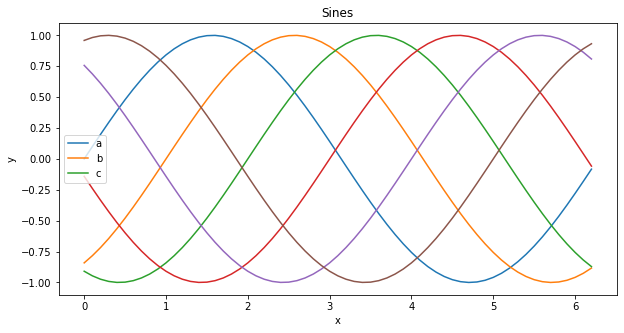

In [41]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 2 * np.pi, 0.1)

y_store = [];
for i in tqdm(range(500000)):
    y_store.append(np.sin(x - i))

# Plot the points using matplotlib
plt.figure(figsize=(10,5))
for i in range(6):
    plt.plot(x, y_store[i])

plt.title('Sines')
plt.legend(['a', 'b', 'c'])
plt.xlabel('x')
plt.ylabel('y');